# 4. Working with larger data sets

This workbook uses a large sample dataset in order to more realistically simulate the set up of the analysis process from start to finish. The dataset is not included directly with this code because of its size but can be downloaded from Zenodo - https://zenodo.org/record/3630511#.XjHhJGj7SUl

We assume that you have downloaded the data, unpacked it and placed it in the *example_data* folder before running this notebook.

The sample analysed is a Titanium-64 Alloy (https://en.wikipedia.org/wiki/Ti-6Al-4V). The energy of the synchrotron beam was 89 KeV, corresponding to a wavelength of ~ 0.14 Å.

The spectra are sampled at a rate of 10 Hz. There are approximately 5500 frames, corresponding to an experiment approximately 9 minutes long.

The experiment begins at room temperature, heats for approximately 200 seconds, is held at constant temperature for about 100 seconds. The material being analysed then undergoes hot tensile deformation for approximately 10 seconds, at around 340 seconds from the start of the experiment. After this the sample is then cooled to room temperature. We expect the crystal structure of the material to be primarily hexagonal ($\alpha$-phase) at room temperature, primarily BCC ($\beta$-phase) at high temperature and we expect some structural changes as a result of the deformation.

We could follow the evolution of the cubic and hexagonal crystals in the material by fitting only a single peak for each. However, this would only give us information for a small subsection of grains within the material. Here, we want to consider as many different lattice plane reflections as possible to see how grains with different crystallographic orientations behave - their micromechanical response and their change in orientation over time.

We follow the beta structure by fitting peaks corresponding to the cubic BCC Miller indices: 110, 200, 211, 220 and 310.

We follow the alpha structure by fitting peaks corresponding to the hexagonal HCP indices: 10-10, 0002, 10-11, 10-12, 11-20, 10-13, 11-22, 20-21, 0004 and 20-22.

## 4.1. Calculating peak angles

Bragg's law gives the angle of scattering from a crystal lattice $(\theta)$ as a function of the radiation wavelength planes $(\lambda)$:

$$ \lambda = 2d \sin (\theta) $$

We have incoming radiation $(\theta)$ of wavelength 0.1393 Å.

The Ti lattice constants for the beta phase are $a_\beta$ = 3.282 Å and for the alpha phase they are $a_\alpha$ = 2.95 Å, $c_\alpha$ = 4.686 Å.

### 4.1.1. Cubic crystal symmetry

For a cubic system the relation between lattice spacing and the lattice constant $(a)$ is:

$$ \frac{1}{d^2} = \frac{h^2 + k^2 + l^2}{a^2}  $$

Combining this relation with Bragg's law gives the relation between the scattering angle, radiation wavelength and lattice constant:

$$ \sin^2(\theta) = \frac{\lambda^2}{4a^2}(h^2 + k^2 + l^2) $$

For BCC the symmetry causes systematic absences in odd numbered hkl planes so we expect to see the 110, 200, 211, 220 and 310 peaks.

The approximate $2\theta$ scattering angles in order of increasing two theta angle are then:

* 110: 3.44°
* 200: 4.87°
* 211: 5.96°
* 220: 6.88°
* 310: 7.70°

### 4.1.2. Hexagonal crystal symmetry

Using the Bravais-Miller system of notation for the hexagonal crystal symmetry (h, k, i, l) the relation between the lattice spacings and the lattice constants is:

$$ d = \frac{a}{\sqrt{\frac{4}{3}(h^2 + k^2 + hk) + \frac{a^2}{c^2}l^2)}} $$

Combining this with Bragg's law gives the relation between the scattering angle, radiation wavelength and lattice constants:

$$ \theta = \sin^{-1} \left( \frac{\lambda \sqrt{\frac{4}{3}(h^2 + k^2 + hk) + \frac{a^2}{c^2}l^2)}}{2a} \right) $$

Iterating through the combinations of indices gives $2\theta$ angles of:

* 10-10: 3.12°
* 0002: 3.41°
* 10-11: 3.56°
* 10-12: 4.62°
* 11-20: 5.41°
* 10-13: 5.99°
* 20-20: 6.25°
* 11-22: 6.40°
* 20-21: 6.48°
* 0004: 6.82°
* 20-22: 7.12°


## 4.2 Finding the peaks

First lets take a look the diffraction pattern and see how it looks.

In [7]:
%matplotlib inline

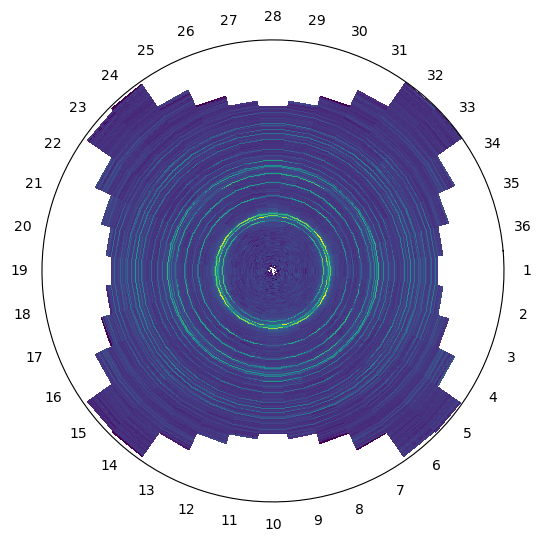

In [8]:
# Sometimes setting the figsize in the first cell doesnt work so this call is in a second cell.
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]

from xrdfit.spectrum_fitting import PeakParams, FitSpectrum, FitExperiment

spectral_data = FitSpectrum(r'example_data_large/adc_065_TI64_NDload_900C_15mms_00001.dat', 90)
spectral_data.plot_polar()

Now plot a single spectrum

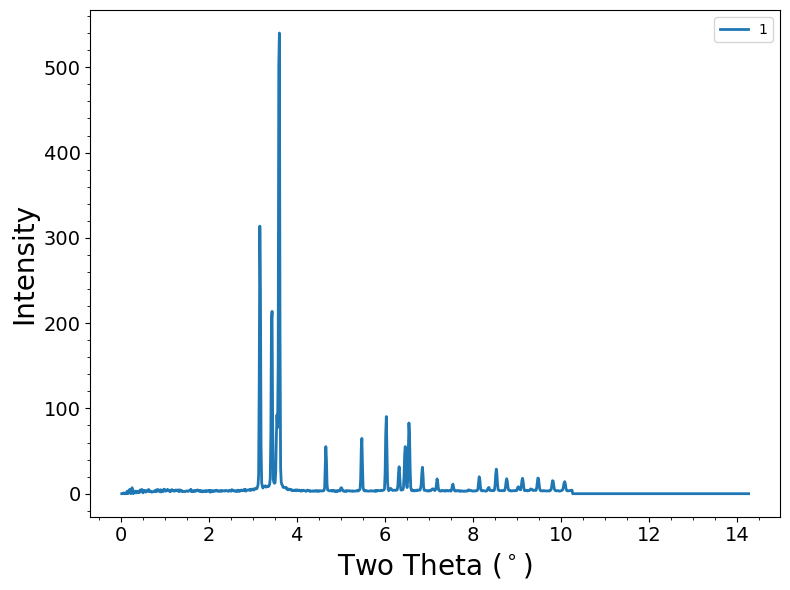

In [9]:
spectral_data.plot(1)

Zoom in a bit.

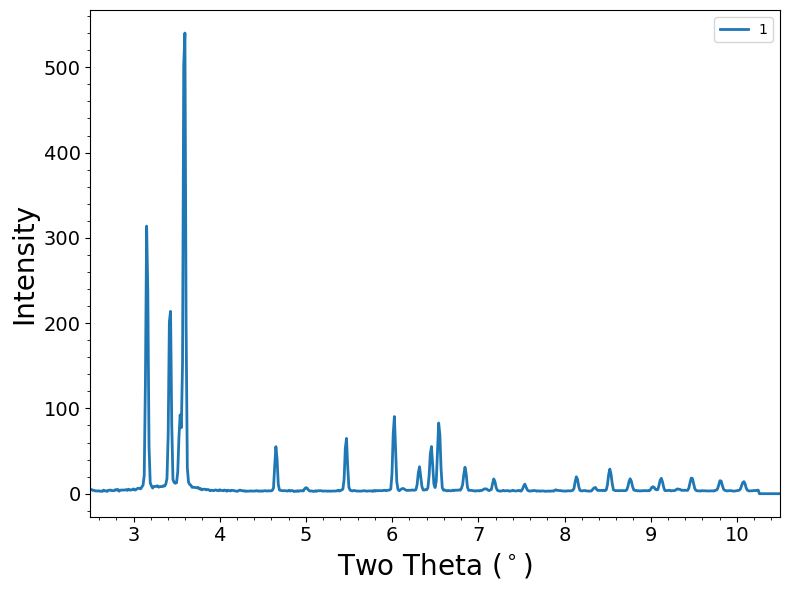

In [10]:
spectral_data.plot(1, x_range=(2.5, 10.5))

This looks reasonable. Since this is the first spectrum at the start of the experiment we expect high intensity hexagonal peaks and weak beta peaks (due to the high alpha volume fraction at room temperature). Using our calculations from above we can zoom into a section at a time and assign the peaks.

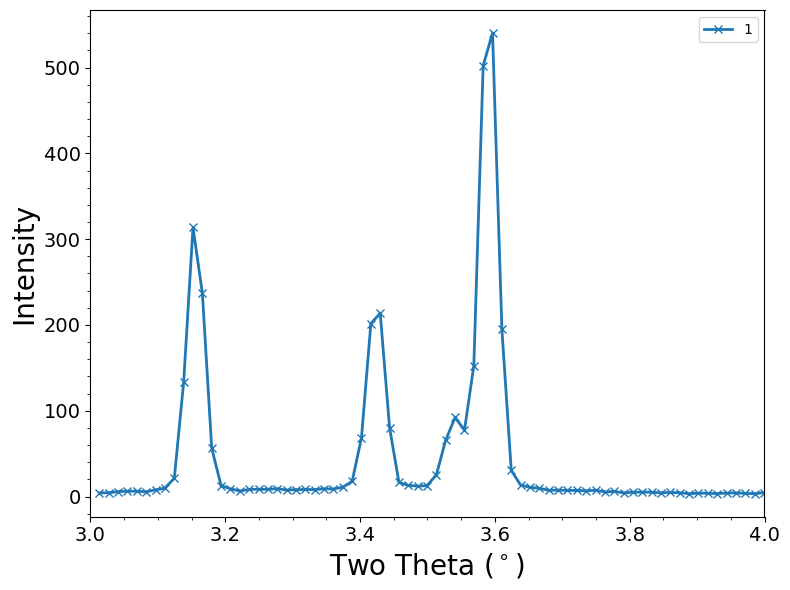

In [11]:
spectral_data.plot(1, x_range=(3, 4), show_points=True)

These peaks are in the right position for the 10-10, 0002, a weak 110 and 10-11. We should fit 0002, 110 and 10-11 as a triplet due to their proximity.

The 110 position is a little higher than our calculated 2-theta value. This is due to alloying additions - inclusion of Vanadium in the beta phase. Therefore, our experimentally measured unit cell size is around $a_\beta$ = 3.18 Å at room temperature. We can then modify our original estimates of the peak positions to:

* 110: 3.55°
* 200: 5.02°
* 211: 6.15°
* 220: 7.10°
* 310: 7.94°

We can quickly plot the peak params to check they are OK, then do the fits and check the fit results.

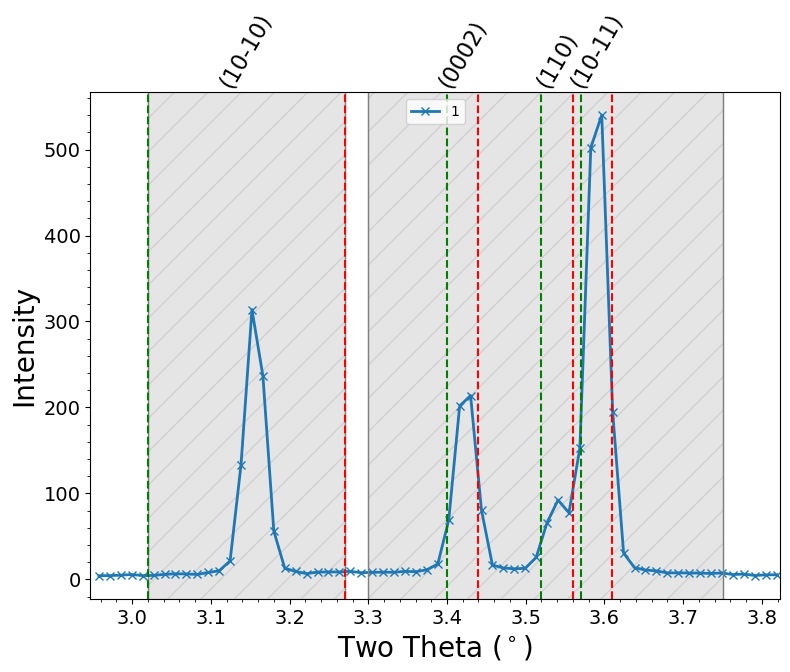

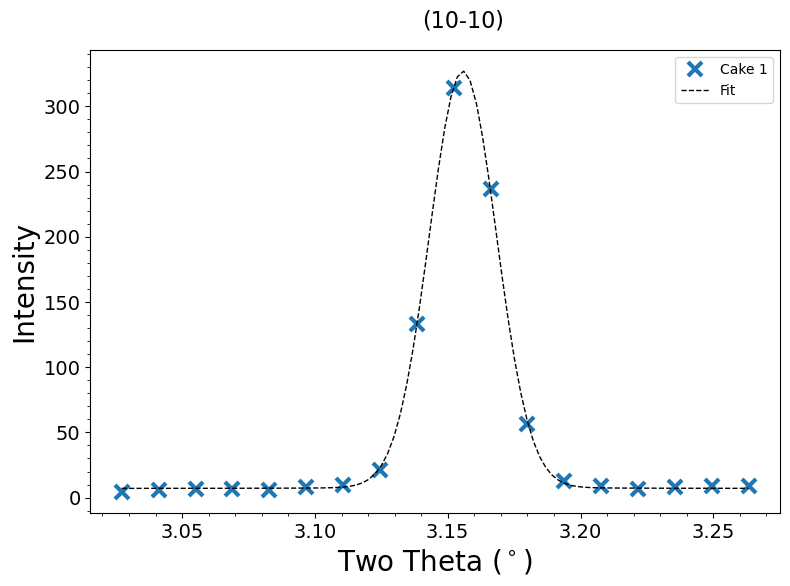

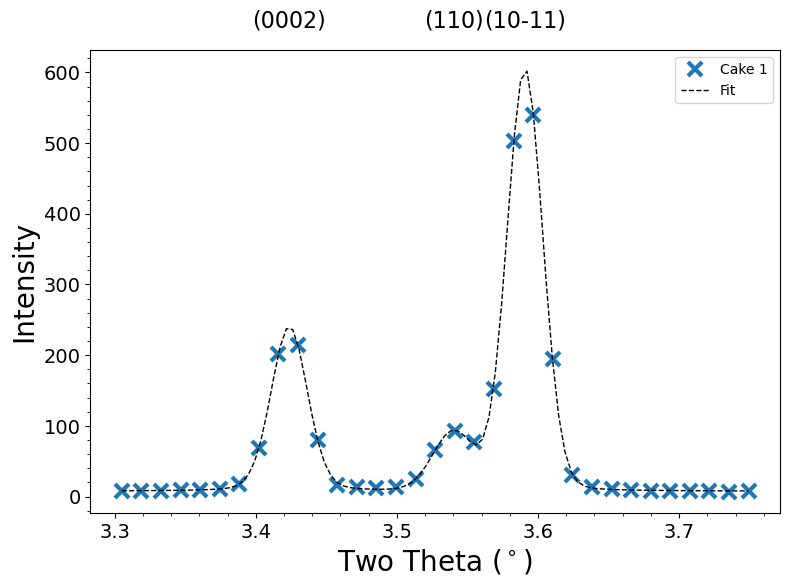

In [12]:
peak_params = [PeakParams((3.02, 3.27), '(10-10)'),
               PeakParams((3.3, 3.75), ['(0002)', '(110)', '(10-11)'], [(3.4, 3.44), (3.52, 3.56), (3.57, 3.61)])]

spectral_data.plot_peak_params(peak_params, 1, show_points=True, label_angle=60)

spectral_data.fit_peaks(peak_params, 1)
spectral_data.plot_fit('(10-10)')
spectral_data.plot_fit('(0002)')

That looks reasonable. Now on to the next section of the spectrum.

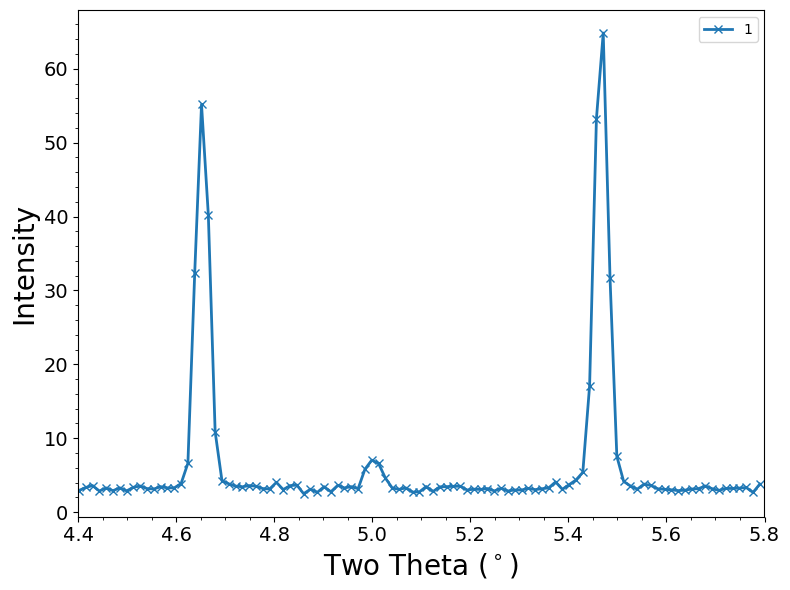

In [13]:
spectral_data.plot(1, x_range=(4.4, 5.8), show_points=True)

These peaks are in the right positions for 10-12, 200 and 11-20. These areas are all distinct enough to be fitted as singlets. Again lets quickly plot the fits to check they are OK.

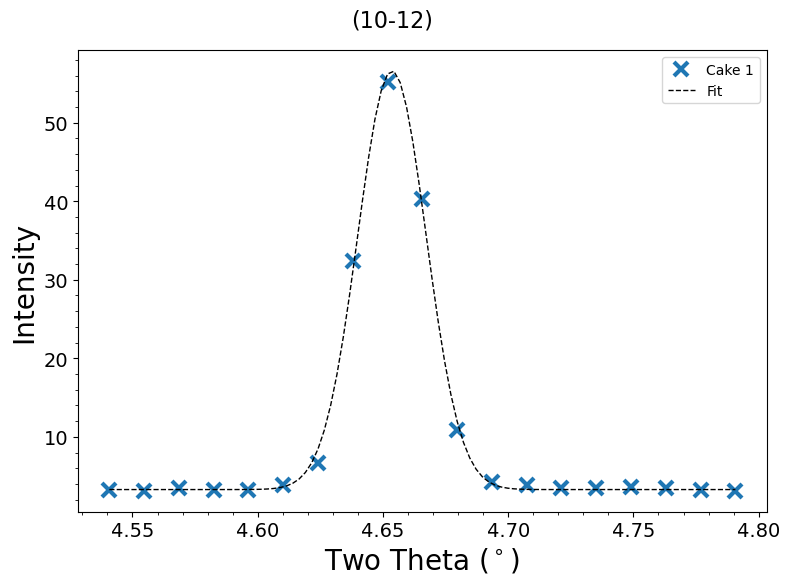

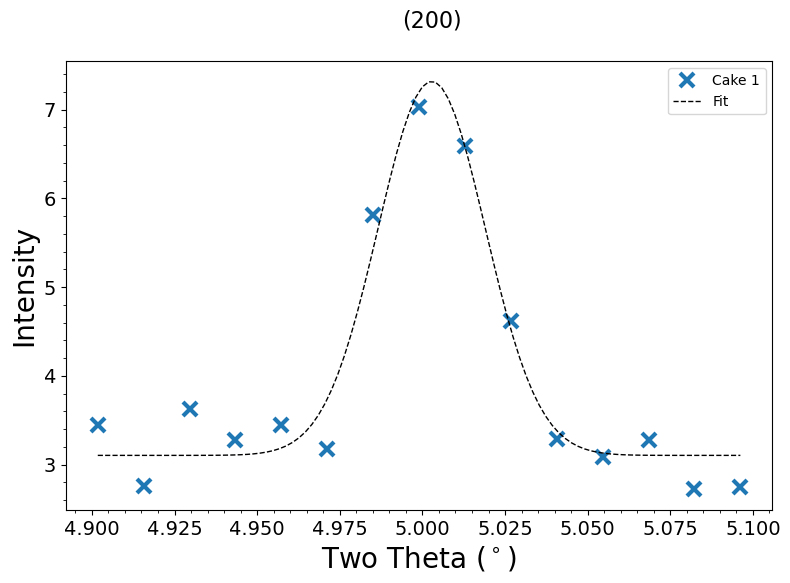

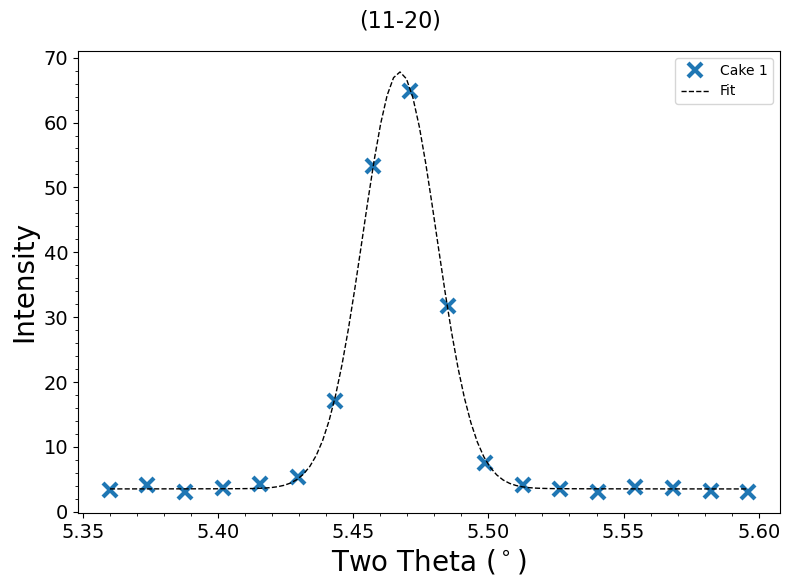

In [14]:
peak_params = [PeakParams((4.54, 4.8), '(10-12)'),
               PeakParams((4.9, 5.10), '(200)'),
               PeakParams((5.35, 5.6), '(11-20)')]

spectral_data.fit_peaks(peak_params, 1)
for fit in spectral_data.fitted_peaks:
    fit.plot()

Now moving up to the next section of the spectrum

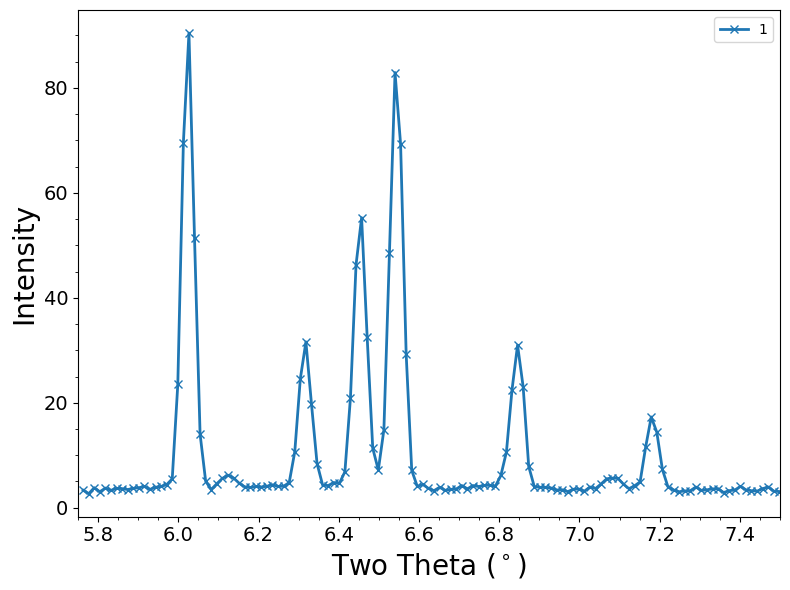

In [15]:
spectral_data.plot(1, x_range=(5.75, 7.5), show_points=True)

The first peak is the hexagonal 10-13. Going with our revised estimates for the cubic structures the small peak at 6.1° must be the 211. The next four strong peaks then correspond to 20-20, 11-22, 20-21 and 0004 in ascending order. Then, there is a weak peak for the cubic 220 and alpha 20-22 is at about 7.2°. We probably dont need the fit for the 20-22 peak as this is a secondary (weaker) reflection of the 10-11 and we have got enough hexagonal peaks at this point. However in order to get the 220 peak we still need to include the 20-22 as the peaks are so close that we wont be able to reliably separate the 220 as a singlet.

With the proximity of these peaks, they would probably be good to fit as a doublet, singlet, doublet and singlet and then doublet.

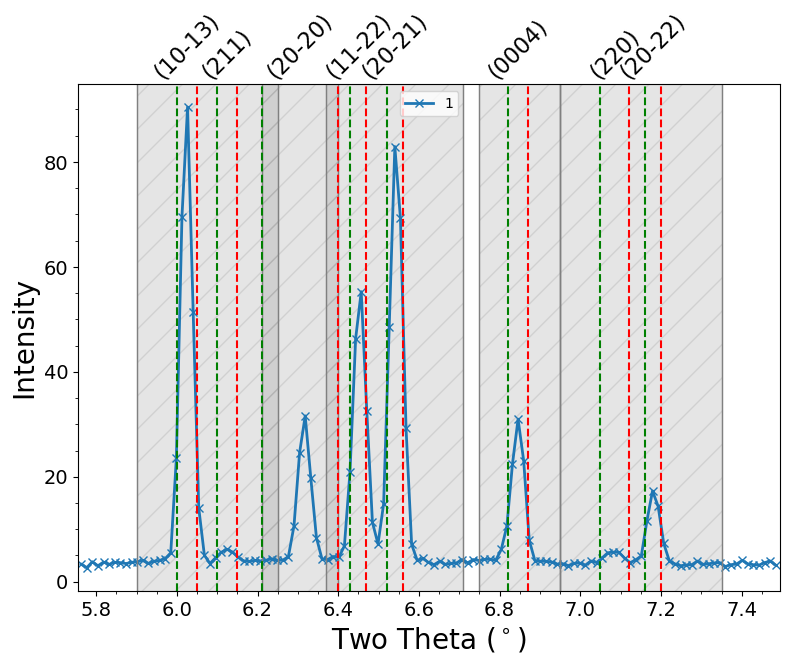

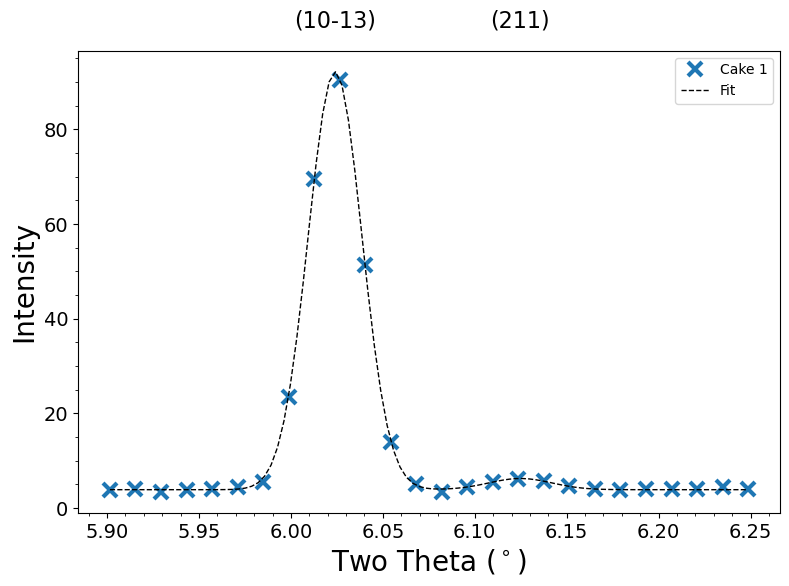

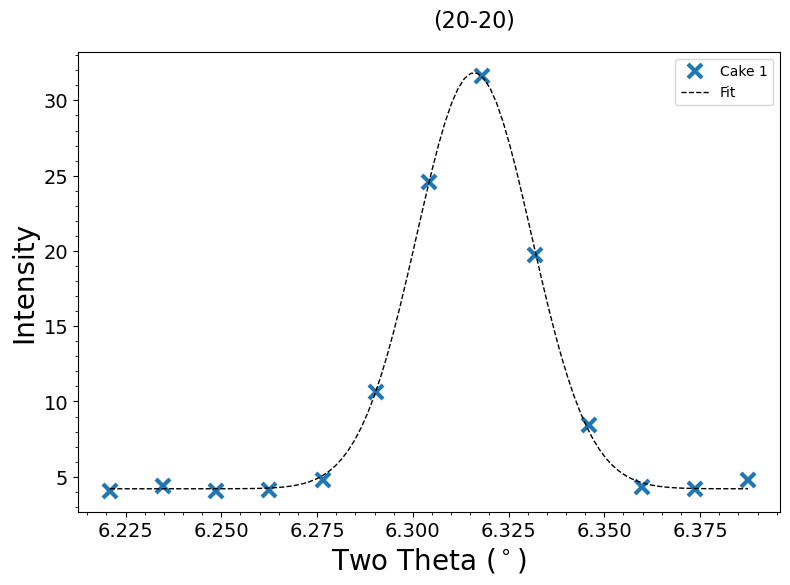

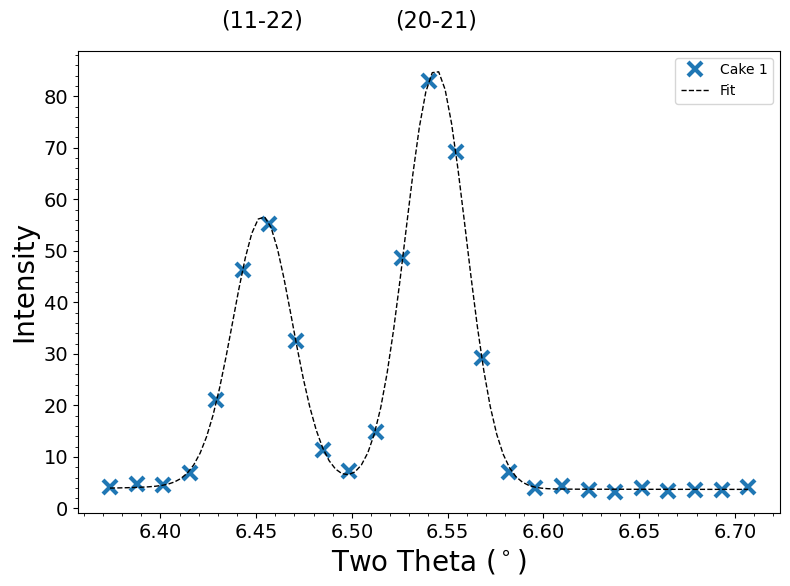

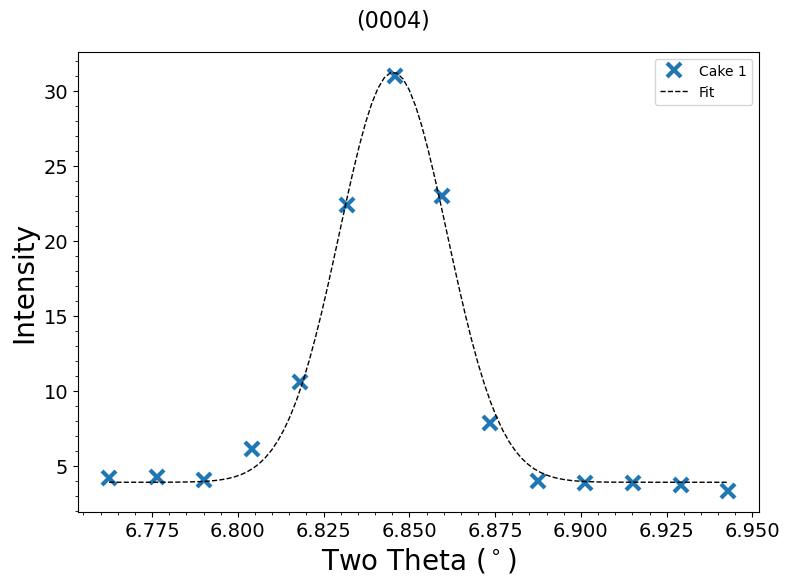

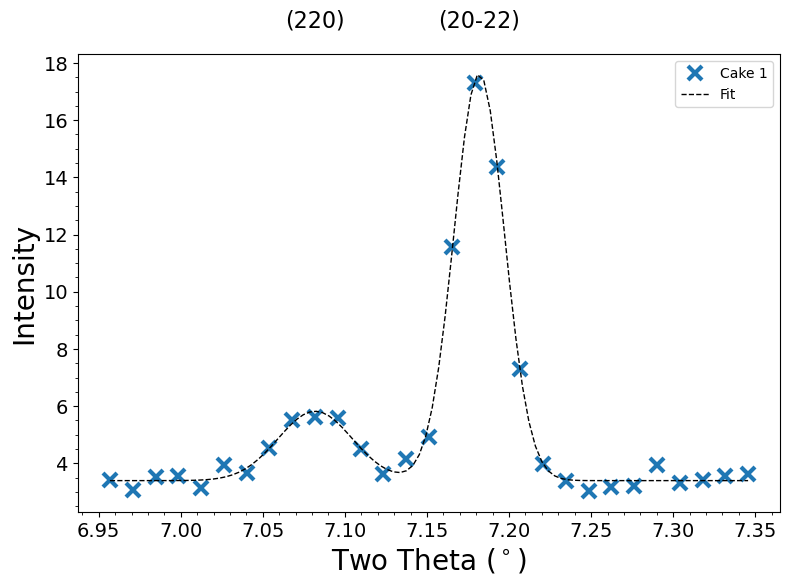

In [16]:
peak_params = [PeakParams((5.9, 6.25), ['(10-13)', '(211)'], [(6.00, 6.05), (6.10, 6.15)]),
               PeakParams((6.21, 6.4), '(20-20)'),
               PeakParams((6.37, 6.71), ['(11-22)', '(20-21)'], [(6.43, 6.47), (6.52, 6.56)]),
               PeakParams((6.75, 6.95), '(0004)', [(6.82, 6.87)]),
               PeakParams((6.95, 7.35), ['(220)', '(20-22)'], [(7.05, 7.12), (7.16, 7.20)])]

spectral_data.plot_peak_params(peak_params, 1, show_points=True, label_angle=45)

spectral_data.fit_peaks(peak_params, 1)
for fit in spectral_data.fitted_peaks:
    fit.plot()

It would be good to try and get another peak for the cubic phase - we should see if we can find the 310 peak.

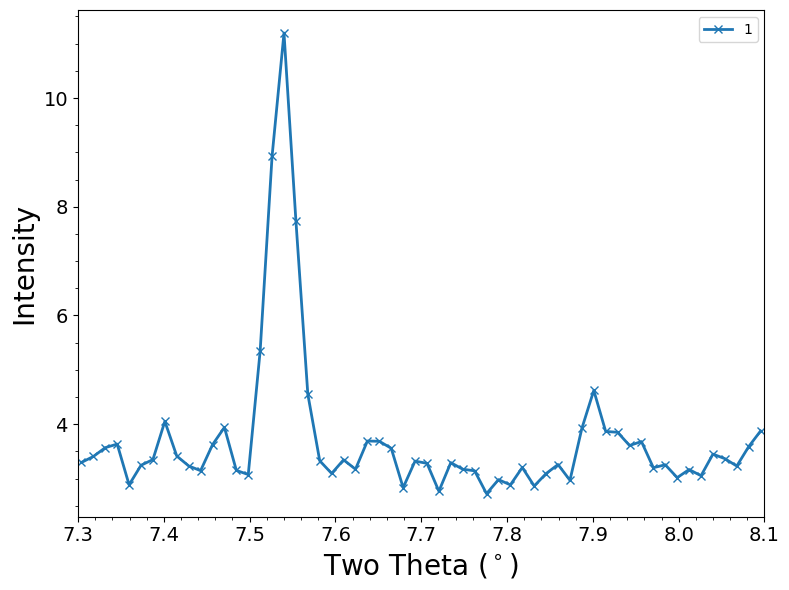

In [17]:
spectral_data.plot(1, x_range=(7.3, 8.1), show_points=True)

The first peak is probably 10-14, we will ignore this as we have enough hexagonal peaks and just try to get the very small 310 peak.

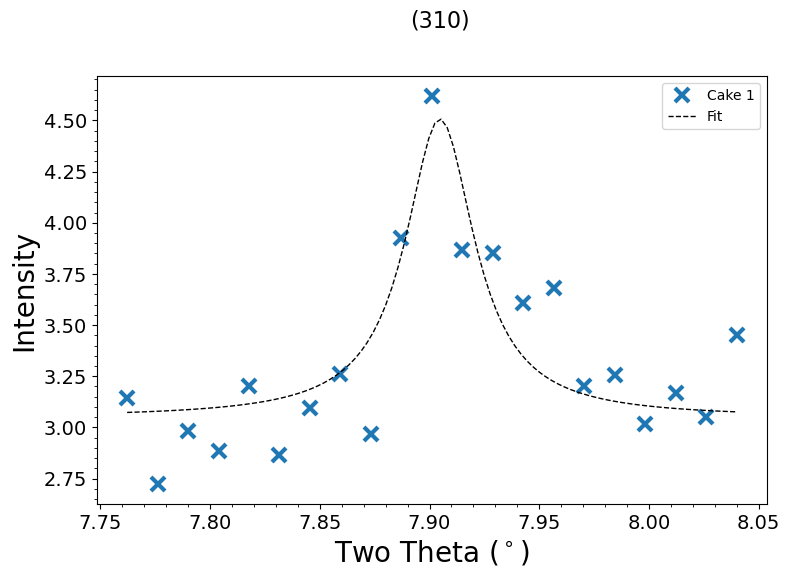

In [18]:
peak_params = [PeakParams((7.75, 8.05), '(310)')]

spectral_data.fit_peaks(peak_params, 1)
for fit in spectral_data.fitted_peaks:
    fit.plot()

It's not a great fit because the peak intensity is so low, but when the percentage of beta phase increases later in the experiment the fit should be better.

Lets put all these peak params together and do a time fit.

## 4.3 Time fitting

### 4.3.1. Initial fit attempt

Lets start by fitting these peaks in every 100th frame to check the fits are OK before fitting the full data set.

In this case we choose to reuse the fits when running the fits. Reusing the fits can cause problems if there is a significant difference between frames, but can be faster if the fits are similar from frame to frame. It is best to try with and without and see which is quicker!

In this case, reusing the fits is quicker because some of the triplet fits have close peaks with very different magnitudes so it is hard for the parameter guessing algorithm to guess good initial parameters to get the inflection point between them.

In [19]:
frame_time = 0.1
file_string = '../example_data/example_data_large/adc_065_TI64_NDload_900C_15mms_{:05d}.dat'
first_cake_angle = 90
cakes_to_fit = 1

In [20]:
peak_params = [PeakParams((3.02, 3.27), '(10-10)'),
               PeakParams((3.30, 3.75), ['(0002)', '(110)', '(10-11)'], [(3.4, 3.44), (3.52, 3.56), (3.57, 3.61)]),
               PeakParams((4.54, 4.80), '(10-12)'),
               PeakParams((4.90, 5.10), '(200)'),
               PeakParams((5.35, 5.60), '(11-20)'),
               PeakParams((5.90, 6.25), ['(10-13)', '(211)'], [(6.00, 6.05), (6.10, 6.15)]),
               PeakParams((6.21, 6.40), '(20-20)'),
               PeakParams((6.37, 6.71), ['(11-22)', '(20-21)'], [(6.43, 6.47), (6.52, 6.56)]),
               PeakParams((6.75, 6.95), '(0004)', [(6.82, 6.87)]),
               PeakParams((6.95, 7.35), ['(220)', '(20-22)'], [(7.05, 7.12), (7.16, 7.20)]),
               PeakParams((7.75, 8.05), '(310)')
              ]
max_frame = 5657
merge_cakes = False
frames_to_fit = range(1, max_frame, 100)
experiment = FitExperiment(frame_time, file_string,first_cake_angle, cakes_to_fit, peak_params, merge_cakes, frames_to_fit)

experiment.run_analysis(reuse_fits=True)

Processing 57 diffraction patterns.


  0%|          | 0/57 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: '../example_data/example_data_large/adc_065_TI64_NDload_900C_15mms_00001.dat'

You may have noticed that the progress bar does not fill linearly. For some time steps the fitting stalls a little. This is because the initial parameters are closer to the final parameters at some time points compared to others. If the fit is complex or some of the maxima intensities are low, many iterations of the fitting minimiser may required to get a good fit. This isn't necessarily a problem, but excessive stalling can be indicative of poor initial parameters.

After the fitting algorithm completes, if there are any peak fits which required more than 500 minimisation steps, they are highlighted in a report. These points should be checked in particular to see if there was a problem with the fitting. If you find that this report flags too many false positives, you can increase the number of minimisation steps that triggers the report by providing the `evaluation_threshold` parameter to the `run_analysis` function.

In this case there are 5 peaks which the fitting has had trouble with at some point in the fitting process. The "(0002) (110) (10-11)", "(20-20)" and "(11-22) (20-21)" peaks only have 1 or 2 slow fits each so they are probably nothing to worry about. However, the "(10-13) (211)" and "(220) (20-22)" peaks have multiple slow fits - these are probably worth checking.

### 4.3.2 Refining the "(10-13) (211)" peak

Lets look at the (10-13) (211) peak first. First we can look at the fit parameters to see if there is anything unusual.

In [ ]:
experiment.plot_fit_parameter("(10-13) (211)", "(10-13)_center", show_points=True)
experiment.plot_fit_parameter("(10-13) (211)", "(10-13)_height", show_points=True)
experiment.plot_fit_parameter("(10-13) (211)", "(211)_center", show_points=True)
experiment.plot_fit_parameter("(10-13) (211)", "(211)_height", show_points=True)

There is definitely something wrong here. The error bars are all over the place and the parameters dont change smoothly over time. 

If there is no error estimate available for a parameter, the data point on the graph is shown as a triangle. The lack of an error estimate may indicate a problem with the fit, although this may not always be the case. The error estimate is made by inverting the curvature matrix of the fit. This will not work if changing the parameter does not significantly affect the fitting result or if changing the parameter results in an evaluation error.

Nevertheless, in this case there is not a smooth trend and the fits for both maxima look poor, so there is probably something wrong with the fits. We can plot the fits directly to see what they look like.

In [ ]:
experiment.plot_fits(peak_names=["(10-13) (211)"], num_time_steps=20)

We can see that although the 211 peak is present at the beginning of the experiment it disappears entirely on heating and doesnt reappear later in the experiment. The doublet fit is still trying to fit two peaks however, even though there is only one and this breaks the fit. The code centers the maxima label on the fitted center and you can see how the centers drift into each other when there is no peak to fit.

In this case it is probably better to ignore the 211 peak entirely as is disappears very quickly and we can't get much information out of it. Since the 211 peak is so small, the 10-13 peak can still be accurately fit on its own as a singlet.

If we wanted to try and get some information from the 211 peak, it would be best to do this as a separate FitExperiment for just this peak and a limited subset of the total frames.

### 4.3.3 Refining the "(220) (20-22)" peak

Lets plot the parameters for the (220) (20-22) peak first: 

In [ ]:
experiment.plot_fit_parameter("(220) (20-22)", "(220)_center", show_points=True)
experiment.plot_fit_parameter("(220) (20-22)", "(220)_height", show_points=True)
experiment.plot_fit_parameter("(220) (20-22)", "(20-22)_center", show_points=True)
experiment.plot_fit_parameter("(220) (20-22)", "(20-22)_height", show_points=True)

The 220 peak looks fine but it is the 20-22 fit that is struggling. Lets plot the fits to see why.

In [ ]:
experiment.plot_fits(peak_names=["(220) (20-22)"], num_time_steps = 30)

There are a few things going on here. From frame 5 to 15 there is a small peak which appears to the left of the fit, this likely confuses the baseline slightly. We can't exclude this however because bringing the peak bounds in would result in one of 220 or 20-22 falling off the edge of the fit later in the experiment when they get further apart.

From frame 20 to 35 the 20-22 peak disappears almost completely. This is OK and the peak is picked up again when it reappears about frame 35 but we should note the the errors on these parameters for the 20-22 maxima are likely to be very large.

Also at various points in the fit the intensities of the peaks are very low compared to the level of the background noise. The fitting will struggle a little when the peak height is not far above the noise. This is to be expected and just requires treating the resultant parameters with care.

There is nothing as such we can do to improve these fits here. Perhaps if these peaks were important they could be fitted separately in a new `FitExperiment` instance, reducing the number of time steps and adjusting the starting parameters. This might seem a little awkward, but `xrdfit` is not really designed to provide high quality fits for peaks with a low signal to noise - it is more designed for high throughput analysis of clear peaks.

### 4.3.4. Implementing the refinements

Lets remove the 211 peak and try the fit again.

In [ ]:
peak_params = [PeakParams((3.02, 3.27), '(10-10)'),
               PeakParams((3.30, 3.75), ['(0002)', '(110)', '(10-11)'], [(3.4, 3.44), (3.52, 3.56), (3.57, 3.61)]),
               PeakParams((4.54, 4.80), '(10-12)'),
               PeakParams((4.90, 5.10), '(200)'),
               PeakParams((5.35, 5.60), '(11-20)'),
               PeakParams((5.90, 6.15), '(10-13)', [(6.00, 6.05)]),
               PeakParams((6.21, 6.40), '(20-20)'),
               PeakParams((6.37, 6.71), ['(11-22)', '(20-21)'], [(6.43, 6.47), (6.52, 6.56)]),
               PeakParams((6.75, 6.95), '(0004)', [(6.82, 6.87)]),
               PeakParams((6.95, 7.35), ['(220)', '(20-22)'], [(7.05, 7.12), (7.16, 7.20)]),
               PeakParams((7.75, 8.05), '(310)')
              ]


max_frame = 5657
frames_to_fit = range(1, max_frame, 100)
experiment = FitExperiment(frame_time, file_string, first_cake_angle, cakes_to_fit, peak_params, merge_cakes, frames_to_fit)

experiment.run_analysis(reuse_fits=True)

The (10-13) peak is now reporting no fits with many iterations. Notice that the analysis also runs about 50% quicker when just this one poor fit was improved.

For a more detailed report which specifies which peaks took the longest to fit you can run the fit report again in detailed mode. This can be useful if the fitting is too slow and you want to identify which peak in particular is taking all of the processing time. Each time `FitExperiment.run_analysis` is run, it generates a `FitReport`. This can be printed with the `print` method.

In [ ]:
experiment.fit_report.print(detailed=True)

Fits which take many iterations to converge like the "(220) (20-22)" peak will take more time. Also the more maxima in a peak, the longer the fit will tend to take. This is because the fit has more parameters and so a greater parameter search space to explore.

For the purposes of this tutorial, we now say that we are happy with these fits and proceed do some science with the fits.

## 4.4. Doing some science

The whole point of the fitting is to use the fitting parameters as part of an analysis to do some science. Here we will show some brief examples of how an analysis might be done. This is not a complete and thorough analysis of this dataset, but serves to show an example of how the fits can be used.

First, we should refit the peaks at a higher frequency. The above fits took on the order of 1 minute to analyse every 100th frame. Running 100 times as many fits will likely take on the order of 100 minutes. This isn't an age, but long enough to make the analysis non-interactive. We should look to a way to increase the fit speed.

We are not so interested in having high temporal resolution data for the majority of the experiment, mainly just the section corresponding to material deformation from about 310 to 340 seconds. Since the *frames_to_fit* parameter can take a non-uniform sequence, we can generate a subset of analysis frames which focuses on the region we are interested on.

In [ ]:
max_frame = 5657
# Range objects can't be appended added so convert them to a list.
initial_steps = list(range(1, 3101, 100))
deformation_steps = list(range(3101, 3401, 2))
end_steps = list(range(3401, max_frame, 100))
frames_to_fit = initial_steps + deformation_steps + end_steps

peak_params = [PeakParams((3.02, 3.27), '(10-10)'),
               PeakParams((3.30, 3.75), ['(0002)', '(110)', '(10-11)'], [(3.4, 3.44), (3.52, 3.56), (3.57, 3.61)]),
               PeakParams((4.54, 4.80), '(10-12)'),
               PeakParams((4.90, 5.10), '(200)'),
               PeakParams((5.35, 5.60), '(11-20)'),
               PeakParams((5.90, 6.15), '(10-13)', [(6.00, 6.05)]),
               PeakParams((6.21, 6.40), '(20-20)'),
               PeakParams((6.37, 6.71), ['(11-22)', '(20-21)'], [(6.43, 6.47), (6.52, 6.56)]),
               PeakParams((6.75, 6.95), '(0004)', [(6.82, 6.87)]),
               PeakParams((6.95, 7.35), ['(220)', '(20-22)'], [(7.05, 7.12), (7.16, 7.20)]),
               PeakParams((7.75, 8.05), '(310)')
              ]

experiment = FitExperiment(frame_time, file_string, first_cake_angle, cakes_to_fit, peak_params, merge_cakes, frames_to_fit)

experiment.run_analysis(reuse_fits=True)

This now takes on the order of 3 minutes (although the analysis time will depend on processor speed) - this allows a much more interactive data analysis, we can quickly check if the result is OK, modify it if necessary and then move on. An analysis can now take an hour instead of a day. Limiting the amount of data analysed can have a big effect on the analysis speed.

We notice in this case that the "(200) (20-22)" fit is a bit slow and perhaps 0004 is worth looking at too. In reality we would want to look at these fits carefully to see what is going on, but for the purpose of this example we will move on to a simple data analysis.

As a next stage we should read in some supplementary experimental data. This is found in the "example_data/instrument_data/065_ETMT_analogue_output.dat" file. This data file contains direct voltages recorded from the mechanical testing rig during the experiment. The sensor data was recorded with the spectra recorded on the SXRD detector, at the same rate (10 Hz). The data columns correspond to frame number, temperature, imposed load and resultant sample deformation. Since the data is in voltage, we must scale them using the calibration from the sensors to get meaningful values.

The scaling for the temperature data is 150°C V$^{-1}$, the imposed load data is 25 N V$^{-1}$ and the resultant deformation (change in position) is scaled as 0.5 mm V$^{-1}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

instrument_data = np.loadtxt("../example_data/instrument_data/065_ETMT_data.txt", skiprows=6)
load = instrument_data[:, 1] * 25
temperature = instrument_data[:, 2] * 150
deformation = instrument_data[:, 3] * 0.5

# Convert frame number to time - data is collected at 10 Hz
instrument_data[:, 0] = instrument_data[:, 0] / 10

plt.plot(instrument_data[:, 0], temperature)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.show()

plt.plot(instrument_data[:, 0], load)
plt.xlabel("Time (s)")
plt.ylabel("Load (N)")
plt.show()

plt.plot(instrument_data[:, 0], deformation)
plt.xlabel("Time (s)")
plt.ylabel("Sample deformation (mm)")
plt.show()

From this data we can see the sequence of the experiment, there is a heating stage, a steady state at high temperature, a deformation and a cooling stage.

We can now plot our fitted peak data along with the experimental data to see how the crystal structure changed during the experiment. Let's try and get the ratio of hexagonal to cubic crystals (alpha to beta phase). We can use the (10-11) maxima to represent the alpha phase and the (110) maxima to represent the beta phase.

In [ ]:
experiment.plot_fit_parameter("(10-11)", "(10-11)_center", show_points=True)
experiment.plot_fit_parameter("(10-11)", "(10-11)_amplitude", show_points=True)

We can see that the angle of the 10-11 peak shifted down with increasing temperature (due to the increase in lattice spacing with thermal energy) and decreased in amplitude - getting quite small during the high temperature section of the experiment.

In [ ]:
print(experiment.fit_parameters('(110)'))
experiment.plot_fit_parameter('(110)', "(110)_center", show_points=True) 
experiment.plot_fit_parameter('(110)', "(110)_amplitude", show_points=True) 

The 110 peak shows matching trends, the peak position shifts down a little and the amplitude greatly increases. Here, we see the hexagonal $(\alpha)$ structure transforming to the cubic $(\beta)$ structure during heating.

To a first order approximation we could calculate the ratio of the $\alpha$ to $\beta$ phase by considering the ratio of peak amplitudes. This is not quite correct because an analysis of the phase fraction also needs to account for the decrease in peak intensity with increasing two theta angle. For a full analysis of the phase fraction changes, we would also need to take an average from multiple peaks and from different directions across our detector, since here we are only sampling a very small subsection of data (grains with a single crystallographic orientation in a single direction). But, this will give us a rough idea.

Here, we take the **fraction of alpha phase** as the ratio of alpha (10-11) / beta (110) in the transverse direction

In [ ]:
alpha_amplitude = experiment.get_fit_parameter("(10-11)", "(10-11)_amplitude")
beta_amplitude = experiment.get_fit_parameter("(110)", "(110)_amplitude")
percentage_alpha = alpha_amplitude[:, 1] / (alpha_amplitude[:, 1] + beta_amplitude[:, 1])

import matplotlib.pyplot as plt
plt.plot(alpha_amplitude[:, 0], percentage_alpha, "-x")
plt.ylabel("Fraction of alpha phase")
plt.xlabel("Time (s)")
plt.show()

Now lets put this phase ratio together with the instrument data to see the correlation.

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(alpha_amplitude[:, 0], percentage_alpha, "-x")
ax1.set_ylabel("Fraction of alpha phase")
ax1.set_xlabel("Time (s)")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Temperature (°C)')
ax2.plot(instrument_data[:, 0], temperature, color="green")
ax2.tick_params(axis='y')

fig.tight_layout() 
plt.show()

As expected, the change in crystal structure is strongly related to the temperature. We also want to know about the deformation though as we can see this distinct from the temperature change between 300 and 350 seconds. We can plot the deformation, temperature and crystal ratio on the same plot to see them all together:

(This dual axis plot is taken from the example at: https://matplotlib.org/examples/pylab_examples/multiple_yaxis_with_spines.html)

In [ ]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots()
fig.subplots_adjust(right=1)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

p1, = host.plot(alpha_amplitude[:, 0], percentage_alpha, "-x", label="Fraction of alpha phase")
p2, = par1.plot(instrument_data[:, 0], temperature, "-", label="Temperature", color="green")
p3, = par2.plot(instrument_data[:, 0], deformation, "-", label="Deformation", color="red")

host.set_xlim(250, 400)
host.set_ylim(0, 0.6)
par1.set_ylim(500, 1000)

host.set_xlabel("Time (s)")
host.set_ylabel("Fraction of alpha phase")
par1.set_ylabel("Temperature (°C)")
par2.set_ylabel("Deformation (mm)")
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

host.axvline(x=316, ymin=0, ymax=1, lw=1, ls="--", color="k")
host.axvline(x=336, ymin=0, ymax=1, lw=1, ls="--", color="k")

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines], bbox_to_anchor=(1.6, 1.0))

plt.show()

The start and end of the deformation are marked by the dashed lines and we can see that during the deformation there appears to be a decrease in the alpha phase fraction (grains with 10-11 in the transverse direction).

Analysing the changes in position and amplitude of the peaks can therefore tell us a lot about the micromechanical and transformational behaviours of the different crystallogrpahic structures within our sample.

We conclude the analysis here since this workbook isn't meant to be about the science as such, however this shows how the fits can be used as part of a more realistic analysis.